## Linear Regression -- Converting manual computation to automatic
In this exercise we will convert manual computation of `forward()` `backward()` and `loss()` to pytorch framework functions. 

**A Recap**
 For each epoch, we computed following: 

*   `forward()` : Nodes operation and output prediction.
*   `loss()` : Calculated the loss between expected VS predicted outputs.
*   `backward()` : Computed gradients.
*   `nudge weights` : Updated weights. 

Ran `n` number of epochs to reduce loss to minimum. This loop is called **Training Loop**. 

At a point where the loss is minimum and it do not decrease any further is the time where we can stop training. These trained weights are called **model**, this model is used for further predictions, called **inference**. During inference we just run forward pass and weights remain unchanged. 

In [1]:
#
# Input data
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 5, 4, 5]
# Expected output
# w = 0.6

from __future__ import print_function
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

seed = 2277
torch.manual_seed(seed)

In [0]:
X = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [5], [4], [5]], dtype=torch.float32)

In [0]:
# From now on we will call forward() as our model.
model = nn.Linear(X.shape[1], Y.shape[1])

Wait! this is the first framework API we used to built Linear model. For its documentaion please [visit](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear). Where, Parameters:



bias – If set to False, the layer will not learn an additive bias. Default: True

*   **in_features** – size of each input sample (i.e. size of x)
*   **out_features** – size of each output sample (i.e. size of y)
*   **bias** – If set to False, the layer will not learn an additive bias. Default: True



In the below code snippet, we are using MSE `nn.MSELoss()` to calculate the loss and `torch.optim.SGD` optimizer for weights update.   

In [4]:
lr = 0.01
epochs = 1500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    # forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # backward pass
    l.backward()

    # nudge weights, causes optimizer to take a step based on the gradients of the parameters.
    optimizer.step()

    # clears old gradients from the last step
    optimizer.zero_grad()

    if epoch % 100 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch {}: w = {:.3f} b = {:.3f} loss = {}'.format((epoch+1), w.item(), b.item(), l))

epoch 1: w = 0.428 b = 0.097 loss = 11.874579429626465
epoch 101: w = 0.977 b = 0.839 loss = 0.819404125213623
epoch 201: w = 0.869 b = 1.230 loss = 0.6524061560630798
epoch 301: w = 0.791 b = 1.509 loss = 0.56757652759552
epoch 401: w = 0.736 b = 1.707 loss = 0.5244860649108887
epoch 501: w = 0.697 b = 1.849 loss = 0.5025975108146667
epoch 601: w = 0.669 b = 1.950 loss = 0.49147891998291016
epoch 701: w = 0.649 b = 2.022 loss = 0.4858308732509613
epoch 801: w = 0.635 b = 2.073 loss = 0.4829619526863098
epoch 901: w = 0.625 b = 2.109 loss = 0.48150452971458435
epoch 1001: w = 0.618 b = 2.135 loss = 0.4807642102241516
epoch 1101: w = 0.613 b = 2.154 loss = 0.4803883135318756
epoch 1201: w = 0.609 b = 2.167 loss = 0.4801971912384033
epoch 1301: w = 0.606 b = 2.177 loss = 0.4801000654697418
epoch 1401: w = 0.605 b = 2.183 loss = 0.4800508916378021


In [5]:
model.weight

Parameter containing:
tensor([[0.6033]], requires_grad=True)

In [6]:
# Number of parameters 
print('Number of parameters : {}'.format(len(list(model.parameters()))))
print('\nList of parameters : {}'.format(list(model.parameters())))

Number of parameters : 2

List of parameters : [Parameter containing:
tensor([[0.6033]], requires_grad=True), Parameter containing:
tensor([2.1881], requires_grad=True)]


# Working with large and Real dataset. 
We will perform the same exercise that we performed above but this time with sklearn toy dataset. Now that we are close to start playing with real world data, best time to read Andrej Karpathy's article '[A Recipe for Training Neural Networks](http://karpathy.github.io/2019/04/25/recipe/)'. Honestly, to me this is real GEM :)  

In [0]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

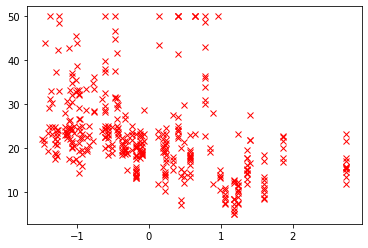

In [8]:
# Toy dataset
boston = load_boston()
X, Y = boston.data, boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=999)
X_train = X_train[:, 4:5]

# Z-Score : Normalize and standardized data (z = (x - u) / s)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
plt.plot(X_train, Y_train, 'rx')

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

epoch 10: w = -0.252 b = 4.834 loss = 414.504150390625
epoch 20: w = -0.910 b = 8.072 loss = 301.5845031738281
epoch 30: w = -1.448 b = 10.717 loss = 226.1984405517578
epoch 40: w = -1.888 b = 12.879 loss = 175.87005615234375
epoch 50: w = -2.247 b = 14.645 loss = 142.2704315185547
epoch 60: w = -2.540 b = 16.089 loss = 119.8390884399414
epoch 70: w = -2.780 b = 17.268 loss = 104.8637466430664
epoch 80: w = -2.976 b = 18.231 loss = 94.86608123779297
epoch 90: w = -3.136 b = 19.018 loss = 88.19155883789062
epoch 100: w = -3.267 b = 19.662 loss = 83.73558807373047
epoch 110: w = -3.373 b = 20.187 loss = 80.76075744628906
epoch 120: w = -3.461 b = 20.617 loss = 78.77471923828125
epoch 130: w = -3.532 b = 20.967 loss = 77.44884490966797
epoch 140: w = -3.590 b = 21.254 loss = 76.56366729736328
epoch 150: w = -3.638 b = 21.488 loss = 75.97272491455078
epoch 160: w = -3.677 b = 21.680 loss = 75.5782241821289
epoch 170: w = -3.709 b = 21.836 loss = 75.31482696533203
epoch 180: w = -3.735 b = 

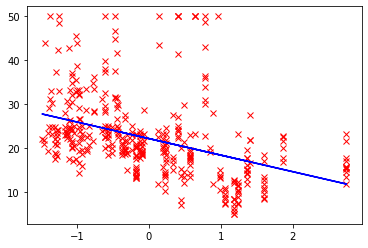

In [9]:
num_samples, num_features = X_train.shape

# Linear Model
model = nn.Linear(num_features, 1)

lr = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training loop
epochs = 200
for epoch in range(epochs):
    
    # forward pass
    Y_pred = model(X_train)

    # loss
    l = loss(Y_train, Y_pred)
    
    # Backward pass and update
    l.backward()
    
    # nudge weights, causes optimizer to take a step based on the gradients of the parameters.
    optimizer.step()

    # clears old gradients from the last step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch {}: w = {:.3f} b = {:.3f} loss = {}'.format((epoch+1), w.item(), b.item(), l))

# Inference: all the X_train points.  
predicted = model(X_train).detach().numpy()
plt.plot(X_train, Y_train, 'rx')
plt.plot(X_train, predicted, 'b')
plt.show()